# Enumeração Exata do Modelo de Ising

Aluno: Arthur Souto Lima  
Mat.: 2018055113

## Imports iniciais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Algoritmos para Enumeração Exata

Aqui são apresentadas as implementações dos pseudocódigos apresentados no enunciado que fazem a modelagem da rede de sítios do Modelo de Ising

In [2]:
def neighbours(N, L):
    """
    Constrói a matriz de vizinhança.
    Assume que há uma "vizinhança circular" como se a rede 
    fosse um toro.
    Adaptação do algoritmo proposto no enunciado
    """
    # Cria uma matriz Nx4
    viz = np.zeros((N,4), dtype=np.longlong)

    # (k,0): vizinho à direita
    # (k,1): vizinho acima
    # (k,2): vizinho à esquerda
    # (k,3): vizinho abaixo]
    for k in range(N):
        # Vizinho à direita (k,0)
        viz[k][0] = k+1
        if (k % L == L-1):
            # Sítio na borda da direita
            viz[k][0] = k+1-L

        # Vizinho acima (k,1)
        viz[k][1] = k+L
        if (k >= N-L):
            # Sítio na borda superior
            viz[k][1] = k+L-N

        # Vizinho à esquerda (k,2)
        viz[k][2] = k-1
        if (k % L == 0):
            # Sítio na borda da esquerda
            viz[k][2] = k+L-1

        # Vizinho abaixo (k,3)
        viz[k][3] = k-L
        if (k < L):
            # Sítio na borda inferior
            viz[k][3] = k+N-L
    return viz

In [3]:
def energy_ising(s, viz):
    """
    Calcula a energia da rede Ising usando os vizinhos de cada sítio.
    É importante notar que precisamos apenas dos 
    vizinhos à direita e acima
    """
    E = 0
    N = len(s)
    for i in range(N):
        right = viz[i][0]
        up = viz[i][1]
        h = s[right] + s[up]
        E = E - s[i]*h
    return E

In [4]:
def energy_flip(Ei, sf, i, viz):
    """
    Calcula a energia da nova configuração sf e 
    qual sítio i foi flipado.
    """
    # Soma os spins dos 4 vizinhos
    Ssj = 0
    for k in range(4):
        idx_viz = viz[i,k]
        Ssj += sf[idx_viz]
    
    # Usa a fórmula do enunciado
    Ef = Ei - 2*sf[i]*Ssj
    return Ef

In [5]:
def gray_flip(tau, N):
    """
    Faz uma mudança na lista tau para saber qual o próximo spin a ser flipado 
    para termos um código gray como o do enunciado.
    Retorna também o índice desse próximo a ser flipado.
    """
    k = tau[0]
    if (k > N):
        print("Return")
        return
    tau[k-1] = tau[k]
    tau[k] = k+1
    if (k != 1):
        tau[0] = 1
    return k,tau

In [6]:
def qtd_energias(N):
    """
    Calcula quais níveis de energia possíveis.
    Retorna também um array com eles.
    Sabe-se que vão de -2N até 2N, inclusive, saltando de 4 em 4
    """
    g = []
    
    i = -2*N
    counter = 1
    g.append(i)
    while(i < 2*N):
        i += 4
        counter += 1
        g.append(i)
    return counter, g

In [7]:
def enumera_ising(N, viz):
    """
    Obtém g(E) enumerando as configurações com auxílio 
    do código gray
    """
    qtd, energs = qtd_energias(N)
    g = {}
    for e in energs:
        g[e] = np.longlong(0)
    s = [-1 for i in range(N)]
    s = np.array(s, dtype=np.longlong)
    tau = [i for i in range(1,N+2)]
    
    E = -2*N
    g[E] = 2
    
    i = np.longlong(1)
    end = np.longlong(pow(2,N-1))
    quoc = np.double(1/end)

    while(i != end):
        k, tau = gray_flip(tau, N)
        h = 0
        sk = s[k]
        
        l0, l1, l2, l3 = viz[k]
        h += s[l0]
        h += s[l1]
        h += s[l2]
        h += s[l3]
        
        E += 2*sk*h
        g[E] += 2
        s[k] = -sk
        
        if (i % 1000000 == 0): 
            print(i, i*quoc)
        i += 1
    return g

## Criação das Redes
Aqui são criadas as redes usando os algoritmos anteriores. Na verdade, os resultados da quantidade de estados por energia foram criados uma vez e salvos num arquivo separado. Assim, não há necessidade de re-execução, basta carregá-los de tais arquivos.

Um detalhe é que o resultado para a rede 6x6 aqui está sendo criado manualmente tendo em vista que por algum motivo, a enumeração do 6x6 está levando um tempo maior do que o esperado. Apesar disso, até mesmo o 5x5 roda em tempo hábil (questão de alguns poucos minutos), o problema está mesmo com o 6x6. Numa tentativa de usar uma linguagem mais rápida, implementei em C++ e ainda assim, numa tarde inteira não conseguiu completar 10% da rede.

In [8]:
def manual6x6():
    """
    Manualmente cria os resultados da rede 6x6
    """
    qtd, energs = qtd_energias(N)
    g6 = {}
    for e in energs:
        g6[e] = np.longlong(0)

    g6[-72] = 2
    g6[-68] = 0
    g6[-64] = 72
    g6[-60] = 144
    g6[-56] = 1620
    g6[-52] = 6048
    g6[-48] = 35148
    g6[-44] = 159840
    g6[-40] = 804078
    g6[-36] = 3846576
    g6[-32] = 17569080
    g6[-28] = 71789328
    g6[-24] = 260434986
    g6[-20] = 808871328
    g6[-16] = 2122173684
    g6[-12] = 4616013408
    g6[- 8] = 8196905106
    g6[- 4] = 11674988208
    g6[  0] = 13172279424

    g6[72] = 2
    g6[68] = 0
    g6[64] = 72
    g6[60] = 144
    g6[56] = 1620
    g6[52] = 6048
    g6[48] = 35148
    g6[44] = 159840
    g6[40] = 804078
    g6[36] = 3846576
    g6[32] = 17569080
    g6[28] = 71789328
    g6[24] = 260434986
    g6[20] = 808871328
    g6[16] = 2122173684
    g6[12] = 4616013408
    g6[ 8] = 8196905106
    g6[ 4] = 11674988208

    return g6

In [9]:
import os.path
import pickle
CREATE_ARRAYS = False

if CREATE_ARRAYS:
    # Criar a enumeração e salvar num arquivo
    # 2x2
    L = 2
    N = L**2
    g2 = enumera_ising(N, neighbours(N,L))
    with open(f"rede{L}x{L}.dict", "wb") as f:
        pickle.dump(g2, f)
    print(f"Criado rede {L}x{L}")
    
    # 4x4
    L = 4
    N = L**2
    g4 = enumera_ising(N, neighbours(N,L))
    with open(f"rede{L}x{L}.dict", "wb") as f:
        pickle.dump(g4, f)
    print(f"Criado rede {L}x{L}")
    
    # 6x6
    L = 6
    N = L**2
#     g6 = enumera_ising(N, neighbours(N,L))
    g6 = manual6x6()
    with open(f"rede{L}x{L}.dict", "wb") as f:
        pickle.dump(g6, f)
    print(f"Criado rede {L}x{L}")
else:
    # Carregar do arquivo
    # 2x2
    L = 2
    N = L**2
    g2 = None
    with open(f"rede{L}x{L}.dict", "rb") as f:
        g2 = pickle.load(f)
    
    # 4x4
    L = 4
    N = L**2
    g4 = None
    with open(f"rede{L}x{L}.dict", "rb") as f:
        g4 = pickle.load(f)
    
    # 6x6
    L = 6
    N = L**2
    g6 = None
    with open(f"rede{L}x{L}.dict", "rb") as f:
        g6 = pickle.load(f)

In [10]:
print(g2)
print(g4)
print(g6)

{-8: 2, -4: 0, 0: 12, 4: 0, 8: 2}
{-32: 2, -28: 0, -24: 32, -20: 64, -16: 424, -12: 1728, -8: 6688, -4: 13568, 0: 20524, 4: 13568, 8: 6688, 12: 1728, 16: 424, 20: 64, 24: 32, 28: 0, 32: 2}
{-72: 2, -68: 0, -64: 72, -60: 144, -56: 1620, -52: 6048, -48: 35148, -44: 159840, -40: 804078, -36: 3846576, -32: 17569080, -28: 71789328, -24: 260434986, -20: 808871328, -16: 2122173684, -12: 4616013408, -8: 8196905106, -4: 11674988208, 0: 13172279424, 4: 11674988208, 8: 8196905106, 12: 4616013408, 16: 2122173684, 20: 808871328, 24: 260434986, 28: 71789328, 32: 17569080, 36: 3846576, 40: 804078, 44: 159840, 48: 35148, 52: 6048, 56: 1620, 60: 144, 64: 72, 68: 0, 72: 2}


## Propriedades Termodinâmicas
Usando os pseudocódigos apresentados, implementa-se os algoritmos que objetivam obter as propriedades termodinâmicas de cada rede

In [11]:
def media_termo(g, energias, N, beta):
    """
    Obtém as propriedades termodinâmicas a uma dada temperatura (com inverso beta),
    dada as energias por configuração (g) e as possíveis energias dessa rede
    """
    Z = 0
    Em = 0
    Em2 = 0
    
    Emin = energias[0]
    Emax = energias[-1]
    
    for E in energias:
        E1 = E - Emin
        Z = Z + g[E]*np.exp(-beta*E1)
        
        Em = Em + E1*g[E]*np.exp(-beta*E1)
        Em2 = Em2 + E1*E1*g[E]*np.exp(-beta*E1)
    Em = Em/Z
    Em2 = Em2/Z
    
    Z = Z*np.exp(-beta*Emin)
    cv = (beta*beta*(Em2-Em**2))/N
    EpS = (Em + Emin)/N
    return Z, EpS, cv

In [12]:
def energia_livre_spin(Z, N, beta):
    """
    Calcula a energia livre por spin, usando a fórmula do enunciado.
    Note que a função np.log é o logaritmo natural.
    """
    result = N * beta
    result = -1/result
    result = result * np.log(Z)  # np.log é o logaritmo natural
    return result

In [13]:
def entropia_spin(e_spin, e_livre_spin, temp):
    """
    Calcula a entropia livre por spin, usando a fórmula do enunciado.
    Note que utiliza a temperatura e não o inverso dela (beta).
    """
    result = e_spin - e_livre_spin
    result = result / temp
    return result

## Resultados e Discussão

### Distribuições de Energia
Inicialmente, vamos comparar as distribuições de energias nas diversas configurações

Text(0.5, 0, 'E/N')

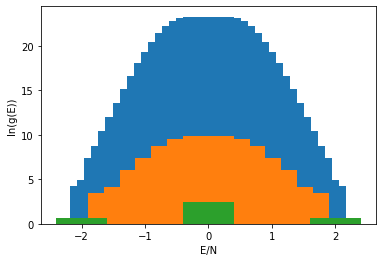

In [14]:
x_4 = []
y_4 = []
N = 4
for key, value in g2.items():
    if (value == 0): continue
    x_4.append(key/N)
    y_4.append(np.log(value))

x_16 = []
y_16 = []
N = 16
for key, value in g4.items():
    if (value == 0): continue
    x_16.append(key/N)
    y_16.append(np.log(value))

x_36 = []
y_36 = []
N = 36
for key, value in g6.items():
    if (value == 0): continue
    x_36.append(key/N)
    y_36.append(np.log(value))
    
ax = plt.gca()
ax.bar(x_36,y_36)
ax.bar(x_16,y_16)
ax.bar(x_4,y_4)
plt.ylabel("ln(g(E))")
plt.xlabel("E/N")

Vemos que o comportamento das distribuições é simétrico com relação á energia 0. Além disso, todas as distribuições começam a se assemelhar a uma normal

### Geração dos dados Termodinâmicos

Utilizando as redes criadas, a enumeração de cada uma e os algoritmos para obter as propriedades termodinâmicas, são apresentados os gráficos comparativos ao longo da temperatura para as redes 2x2, 4x4 e 6x6. São feitas, também, algumas discussões sobre esses resultados.

In [15]:
# Geração dos dados
x_4 = []
y1_4 = []
y2_4 = []
y3_4 = []
y4_4 = []

x_16 = []
y1_16 = []
y2_16 = []
y3_16 = []
y4_16 = []

x_36 = []
y1_36 = []
y2_36 = []
y3_36 = []
y4_36 = []

step = 0.01
t_min = 1
t_max = 5

for temp in np.arange(t_min,t_max,step):
    beta = 1/temp
    
    # 2x2
    N = 4
    qtd, energs = qtd_energias(N)
    Z, EpS, cv = media_termo(g2, energs, N, beta)
    x_4.append(temp)
    y1_4.append(EpS)  # Energia por spin
    y2_4.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_4.append(liv_spin)   # Energia livre por spin
    y4_4.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin
    
    # 4x4
    N = 16
    qtd, energs = qtd_energias(N)
    Z, EpS, cv = media_termo(g4, energs, N, beta)
    x_16.append(temp)
    y1_16.append(EpS)  # Energia por spin
    y2_16.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_16.append(liv_spin)   # Energia livre por spin
    y4_16.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin
    
    # 6x6
    N = 36
    qtd, energs = qtd_energias(N)
    Z, EpS, cv = media_termo(g6, energs, N, beta)
    x_36.append(temp)
    y1_36.append(EpS)  # Energia por spin
    y2_36.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_36.append(liv_spin)   # Energia livre por spin
    y4_36.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin

### Calor Específico

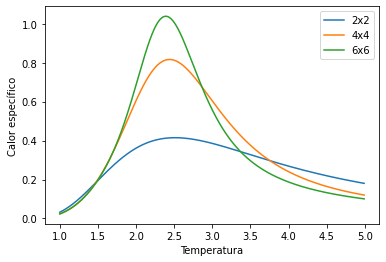

In [16]:
# Plot Calor Específico
plt.plot(x_4 ,y2_4 )
plt.plot(x_16,y2_16)
plt.plot(x_36,y2_36)
plt.ylabel("Calor específico")
plt.xlabel("Temperatura")
plt.legend(["2x2","4x4","6x6"])
plt.show()

Há um pico do calor específico em torno de 2.5 de temperatura, ou seja, nessas redes do modelo de Ising que fizemos, numa temperatura de 2.5 teremos que fornecer mais energia para o sistema para que sua temperatura aumente. Como referido no enunciado, esse aumento no calor específico nesse ponto pode indicar, por exemplo, uma transição de fase.

É interessante notar que, a curva do 6x6 tem um pico maior que a do 4x4, que, por sua vez, é maior que o do 2x2. Apesar disso, a do 6x6 cai primeiro e para um valor menor, seguida do 4x4 e do 2x2.

### Energia por Spin e Energia Livre por Spin

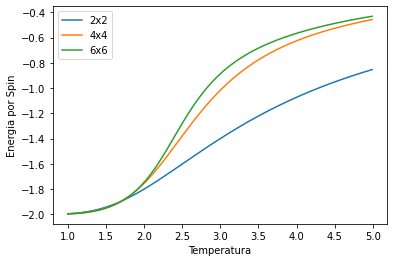

In [17]:
# Plot Energia por Spin
plt.plot(x_4 ,y1_4 )
plt.plot(x_16,y1_16)
plt.plot(x_36,y1_36)
plt.ylabel("Energia por Spin")
plt.xlabel("Temperatura")
plt.legend(["2x2","4x4","6x6"])
plt.show()

A energia por sítio aumenta com o aumento da temperatura como esperado. Numa rede maior, esse aumento é mais rápido, sobretudo a partir da temperatura de 2. Todos começam com uma energia por spin muito baixa, equivalen

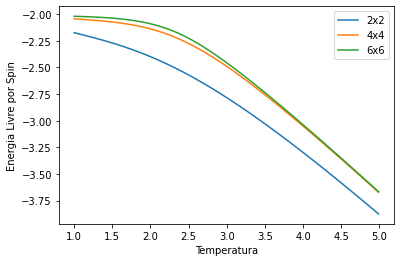

In [18]:
# Plot Energia Livre por Spin
plt.plot(x_4 ,y3_4 )
plt.plot(x_16,y3_16)
plt.plot(x_36,y3_36)
plt.ylabel("Energia Livre por Spin")
plt.xlabel("Temperatura")
plt.legend(["2x2","4x4","6x6"])
plt.show()

Juntando esse resultado com o da energia por spin, podemos notar, naturalmente, que com o aumento da temperatura, a energia por spin aumenta enquanto a sua energia livre diminui. Nesses dois gráficos, também, a partir de 2.5 de temperatura há uma mudança no comportamento das curvas. A energia livre diminui mais rapidamente enquanto a energia por spin aumentou mais rapidamente. Comparando as curvas entre as redes de dimensões diferentes, vemos que as redes 4x4 e 6x6 ficam muito próximas, novamente. A rede 2x2 teve um comportamento parecido, apesar de um pouco abaixo das das outras redes, tanto na energia por spin quanto na energia livre por spin

### Entropia por Spin

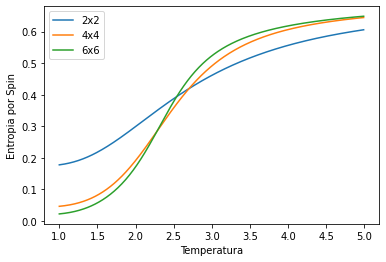

In [19]:
# Plot Entropia por Spin
plt.plot(x_4 ,y4_4 )
plt.plot(x_16,y4_16)
plt.plot(x_36,y4_36)
plt.legend(["2x2","4x4","6x6"])
plt.ylabel("Entropia por Spin")
plt.xlabel("Temperatura")
plt.show()

Em concordância com o que vimos, com o aumento da temperatura, há um aumento da temperatura do sistema. É notável que à temperatura de 1, a entropia do 2x2 é maior do que a das outras duas redes. Além disso, a rede 4x4 tem uma entropia por spin um pouco maior que a do 6x6 nessa temperatura, apesar de que ambas estão próximas de 0.   
Aqui ocorre um comportamento semelhante ao que ocorreu com as curvas de calor específico, inicialmente, a ordem é 2x2 > 4x4 > 6x6. Porém, após o marco da temperatura de 2.5, a situação se reverte de forma que a ordem passa a ser 6x6 > 4x4 > 2x2.

### Equação da Energia

_Essa última expressão mostra que as energias permitidas para o modelo de Ising estão no intervalo de $−2N$ a $2N$ em passos de 4, sendo que os estados de energia $−2N+4$ e $2N−4$ não são permitidos. Verifique essas afirmações._


$$
E = -\sum{\sigma_k\sigma_l}
$$

#### Questão do $-2N$ e $+2N$
Como vimos em aula, há duas configurações com a energia de $-2N$. A primeira delas é quando todos os sítios estão em $+1$. Nesse caso, para cada sítio, tendo em vista que temos que considerar dois vizinhos na equação da energia, como todos estão em $+1$, teremos $-(+1)\cdot(+1)=-1$ para cada um dos dois vizinhos, totalizando $-2$ a soma deles. Isso é feito para cada sítio, logo teremos um total de $-2N$ para toda a rede. Um raciocínio análogo serve para obtermos que todos os sítios em $-1$ tem energia $-2N$ também. Em ambos os casos, qualquer mudança de spins aumenta a energia do sistema, logo este é o valor mínimo possível.

Também baseado no que vimos, sabemos que há apenas duas outras configurações com energia de $+2N$. Ela ocorre quando há uma distribuição alternada de $+1$ e $-1$ entre os sítios, nas linhas e nas colunas. Nesse caso, todo sítio tem dois vizinhos com sinal contrário ao dele próprio. Assim, o produto será $-(+1)\cdot(-1)=+1$ para os dois vizinhos (caso o sítio seja $-1$) ou $-(-1)\cdot(+1)=+1$ (caso o sítio seja $+1$). Em ambos os casos, teremos a soma de $+2$ para cada sítio, portanto, $+2N$ para todos os sítios. Em ambos os casos, qualquer mudança diminui a energia do sistema, portanto este é o valor máximo possível de energia.

#### Questão dos passos de 4 em 4

Agora temos que mostrar que as energias só podem ser dados de 4 em 4 unidades de energia. Vamos utilizar a equação de energia considerando o flip de um único sítio. 

$$
E_f = E_i -2s_i'\sum_j{s_j} \\
\text{sendo $j$ os 4 vizinhos do sítio já flipado $s_i'$}
$$

Para que a diferença seja de 4 unidades, o produto $-2s_i'\sum_j{s_j}$ deve ser múltiplo (inteiro) de 4. O valor de $s_i'$ só pode se $+1$ ou $-1$. Enquanto isso, a soma $\sum_j{s_j}$ só pode assumir cinco valores, sendo que a adição é comutativa, então as outras combinações dos spins dos vizinhos também cairão em algum desses cinco casos. Para todos esses cinco valores, quando os multiplicamos por $(-2)\cdot(\pm1)$ caímos num múltiplo de 4. Assim, os passos das energias possíveis devem ser de 4 em 4.

$$
(+1)+(+1)+(+1)+(+1)=+4 \\
(-1)+(+1)+(+1)+(+1)=+2 \\
(-1)+(-1)+(+1)+(+1)= 0 \\
(-1)+(-1)+(-1)+(+1)=-2 \\
(-1)+(-1)+(-1)+(-1)=-4 \\
$$

#### Níveis 4 níveis do máximo ou do mínimo

Já mostramos que há duas configurações com $-2N$ e com $+2N$ e que os passos são de 4 em 4. Nos resta mostrar que não é possível haver uma configuração ou com $-2N+4$ ou com $+2N-4$. 


Quando todos os spins são iguais, temos a energia mínima de $-2N$.Vamos analisar o caso em que todos os sítios estão com $+1$, o caso inverso é análogo. Qualquer mudança em algum spin criará um único sítio com spin contrário e cairemos ou no caso do somatório $+4$. Desse modo, o produto na fórmula de flip da energia será $-2s_i'\sum_j{s_j}=-2\cdot(-1)\cdot4=8$, logo a diferença é de 8. Não é possível atingir o estado com 4 unidades de diferença desse mínimo.



Quando os spins estão alternados de forma equilibrada, temos o caso de energia máxima. Vamos mudar um spin que era $-1$ para $+1$. O outro caso é análogo. Quando isso ocorre, o sítio com o novo spin e seus quatro vizinhos terão o mesmo sinal $+1$. Aqui também o somatório dos spins dos vizinhos é de $+4$ de forma que o produto será $-8$ agora. Assim, tal como no contexto anterior, não é possível atingir o nível 4 unidades abaixo do máximo.